In [17]:
from datasets import load_dataset
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Loading sentiment z https://huggingface.co/datasets/cardiffnlp/tweet_eval
dataset = load_dataset("cardiffnlp/tweet_eval", "sentiment")
train_data = dataset["train"]
test_data = dataset["test"]

df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

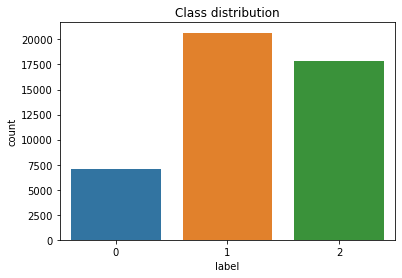

In [20]:
# Checking dataset
sns.countplot(x=df_train['label'])
plt.title("Class distribution")
plt.show()

Accuracy: 0.5843373493975904
              precision    recall  f1-score   support

    negative       0.65      0.38      0.48      3972
     neutral       0.59      0.73      0.65      5937
    positive       0.52      0.58      0.54      2375

    accuracy                           0.58     12284
   macro avg       0.58      0.56      0.56     12284
weighted avg       0.59      0.58      0.57     12284



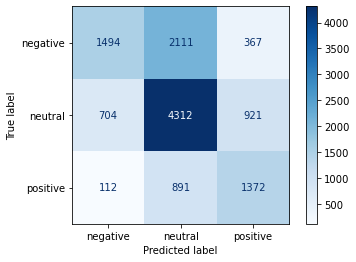

In [22]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

y_train = df_train['label']
y_test = df_test['label']

# Logistic Regression 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["negative", "neutral", "positive"]))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap="Blues")